In [2]:
import numpy as np 
import pandas as pd 
from datetime import datetime
import math 
import matplotlib.pyplot as plt
import datetime 

In [4]:
df = pd.read_csv("demo.csv")
df.head()

,time,.header.seq,.header.stamp.secs,.header.stamp.nsecs,.header.frame_id,.child_frame_id,.pose.pose.position.x,.pose.pose.position.y,.pose.pose.position.z,.pose.pose.orientation.x,...,.pose.pose.orientation.z,.pose.pose.orientation.w,.pose.covariance,.twist.twist.linear.x,.twist.twist.linear.y,.twist.twist.linear.z,.twist.twist.angular.x,.twist.twist.angular.y,.twist.twist.angular.z,.twist.covariance
0,2023/10/05/19:39:04.931280,4111,5956,338021960,dlo_odom,base_link,0.010769,0.027937,-0.007683,-0.025721,...,0.009096,0.999602,"(0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",0.0,0.0,0.0,0.0,0.0,0.0,"(0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."
1,2023/10/05/19:39:05.029023,4112,5956,438025240,dlo_odom,base_link,0.013032,0.026847,-0.007891,-0.025998,...,0.009180,0.999593,"(0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",0.0,0.0,0.0,0.0,0.0,0.0,"(0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."
2,2023/10/05/19:39:05.132844,4113,5956,537934150,dlo_odom,base_link,0.013298,0.028422,-0.007848,-0.025768,...,0.009153,0.999600,"(0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",0.0,0.0,0.0,0.0,0.0,0.0,"(0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."
3,2023/10/05/19:39:05.230186,4114,5956,637740880,dlo_odom,base_link,0.011569,0.027304,-0.007453,-0.025845,...,0.009110,0.999598,"(0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",0.0,0.0,0.0,0.0,0.0,0.0,"(0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."
4,2023/10/05/19:39:05.328731,4115,5956,737528990,dlo_odom,base_link,0.011563,0.027509,-0.009017,-0.025947,...,0.009075,0.999596,"(0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",0.0,0.0,0.0,0.0,0.0,0.0,"(0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."


In [5]:
df.columns.values

array(['time', '.header.seq', '.header.stamp.secs', '.header.stamp.nsecs',
       '.header.frame_id', '.child_frame_id', '.pose.pose.position.x',
       '.pose.pose.position.y', '.pose.pose.position.z',
       '.pose.pose.orientation.x', '.pose.pose.orientation.y',
       '.pose.pose.orientation.z', '.pose.pose.orientation.w',
       '.pose.covariance', '.twist.twist.linear.x',
       '.twist.twist.linear.y', '.twist.twist.linear.z',
       '.twist.twist.angular.x', '.twist.twist.angular.y',
       '.twist.twist.angular.z', '.twist.covariance'], dtype=object)

In [6]:
df.rename(columns = {'.pose.pose.position.x':'PosX', '.pose.pose.position.y':'PosY' ,'.pose.pose.position.z':'PosZ' ,\
     '.pose.pose.orientation.x':'OrX','.pose.pose.orientation.y':'OrY','.pose.pose.orientation.z':'OrZ','.pose.pose.orientation.w':'OrW'}, inplace = True)
df.head()

,time,.header.seq,.header.stamp.secs,.header.stamp.nsecs,.header.frame_id,.child_frame_id,PosX,PosY,PosZ,OrX,...,OrZ,OrW,.pose.covariance,.twist.twist.linear.x,.twist.twist.linear.y,.twist.twist.linear.z,.twist.twist.angular.x,.twist.twist.angular.y,.twist.twist.angular.z,.twist.covariance
0,2023/10/05/19:39:04.931280,4111,5956,338021960,dlo_odom,base_link,0.010769,0.027937,-0.007683,-0.025721,...,0.009096,0.999602,"(0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",0.0,0.0,0.0,0.0,0.0,0.0,"(0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."
1,2023/10/05/19:39:05.029023,4112,5956,438025240,dlo_odom,base_link,0.013032,0.026847,-0.007891,-0.025998,...,0.009180,0.999593,"(0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",0.0,0.0,0.0,0.0,0.0,0.0,"(0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."
2,2023/10/05/19:39:05.132844,4113,5956,537934150,dlo_odom,base_link,0.013298,0.028422,-0.007848,-0.025768,...,0.009153,0.999600,"(0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",0.0,0.0,0.0,0.0,0.0,0.0,"(0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."
3,2023/10/05/19:39:05.230186,4114,5956,637740880,dlo_odom,base_link,0.011569,0.027304,-0.007453,-0.025845,...,0.009110,0.999598,"(0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",0.0,0.0,0.0,0.0,0.0,0.0,"(0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."
4,2023/10/05/19:39:05.328731,4115,5956,737528990,dlo_odom,base_link,0.011563,0.027509,-0.009017,-0.025947,...,0.009075,0.999596,"(0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",0.0,0.0,0.0,0.0,0.0,0.0,"(0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."


In [7]:
df.columns.values

array(['time', '.header.seq', '.header.stamp.secs', '.header.stamp.nsecs',
       '.header.frame_id', '.child_frame_id', 'PosX', 'PosY', 'PosZ',
       'OrX', 'OrY', 'OrZ', 'OrW', '.pose.covariance',
       '.twist.twist.linear.x', '.twist.twist.linear.y',
       '.twist.twist.linear.z', '.twist.twist.angular.x',
       '.twist.twist.angular.y', '.twist.twist.angular.z',
       '.twist.covariance'], dtype=object)

In [8]:
df.drop(['.header.seq', '.header.stamp.secs', '.header.stamp.nsecs','.header.frame_id' ,\
    '.child_frame_id', '.pose.covariance', '.twist.twist.linear.x',\
       '.twist.twist.linear.y', '.twist.twist.linear.z',\
       '.twist.twist.angular.x', '.twist.twist.angular.y',\
       '.twist.twist.angular.z', '.twist.covariance','OrX', 'OrY', 'OrZ', 'OrW','PosZ'], inplace=True, axis=1)
# df.drop(['PosZ', '.pose.pose.orientation.x', '.pose.pose.orientation.y', '.pose.pose.orientation.z',\
#        '.pose.pose.orientation.w'], inplace=True, axis=1)
df.head()

,time,PosX,PosY
0,2023/10/05/19:39:04.931280,0.010769,0.027937
1,2023/10/05/19:39:05.029023,0.013032,0.026847
2,2023/10/05/19:39:05.132844,0.013298,0.028422
3,2023/10/05/19:39:05.230186,0.011569,0.027304
4,2023/10/05/19:39:05.328731,0.011563,0.027509


In [9]:
from datetime import datetime
df['time']= df['time'].apply(lambda x: datetime.strptime(x.strip(), '%Y/%m/%d/%H:%M:%S.%f'))
df['time']

0      2023-10-05 19:39:04.931280
1      2023-10-05 19:39:05.029023
2      2023-10-05 19:39:05.132844
3      2023-10-05 19:39:05.230186
4      2023-10-05 19:39:05.328731
                  ...            
1050   2023-10-05 19:40:49.927247
1051   2023-10-05 19:40:50.033702
1052   2023-10-05 19:40:50.139151
1053   2023-10-05 19:40:50.234886
1054   2023-10-05 19:40:50.325991
Name: time, Length: 1055, dtype: datetime64[ns]

In [10]:
df.head(5)

,time,PosX,PosY
0,2023-10-05 19:39:04.931280,0.010769,0.027937
1,2023-10-05 19:39:05.029023,0.013032,0.026847
2,2023-10-05 19:39:05.132844,0.013298,0.028422
3,2023-10-05 19:39:05.230186,0.011569,0.027304
4,2023-10-05 19:39:05.328731,0.011563,0.027509


## Calculate the Velocity 

In [34]:
lastPx = df.PosX[0] 
lastPy = df.PosY[0]
lastT = df.time[0].timestamp() - 0.001
vMag = []
timeStamp = []
t = []
for idx , (currentT , currentPx, currentPy) in enumerate (zip(df.time ,df.PosX, df.PosY)):
    #if idx !=0:  
    currentT = currentT.timestamp() #- df.time[0].timestamp()
    # else:
        # currentT = 0 
    timeStamp.append((currentT)) # in mins
    t.append(currentT-timeStamp[0])
    dt = currentT-lastT
    dt = max(dt, 0.03)
    # print(dt) 
    dx = currentPx - lastPx
    # print(dx)
    dy = currentPy - lastPy
    # print(dy)
    # try:
    currentVx = float(dx)/float(dt)
    # except:
        # print("division by Zero , 2lak ma henta ")
    currentVy = float(dy/dt) 
    vv =math.sqrt(currentVx**2 + currentVy**2)
    if vv > 1200:
        print(dx, dy, dt, currentVx, currentVy)
    # print(vv)
    vMag.append(vv)
    lastT , lastPx  , lastPy  = currentT , currentPx  , currentPy 

df['Vmag'] = vMag
df['t'] = t
df.describe()

,PosX,PosY,Vmag,t
count,954.000000,954.000000,954.000000,954.000000
mean,15.438014,6.492354,0.381629,47.657191
std,4.623089,5.228492,0.146826,27.556083
min,3.397630,0.147319,0.000000,0.000000
25%,12.681017,2.269811,0.325369,23.861392
50%,16.553815,4.112908,0.379571,47.657979
75%,18.812107,12.563754,0.428022,71.482400
max,21.469028,14.315099,1.582563,95.295684


## Plot the Velocity Profile 

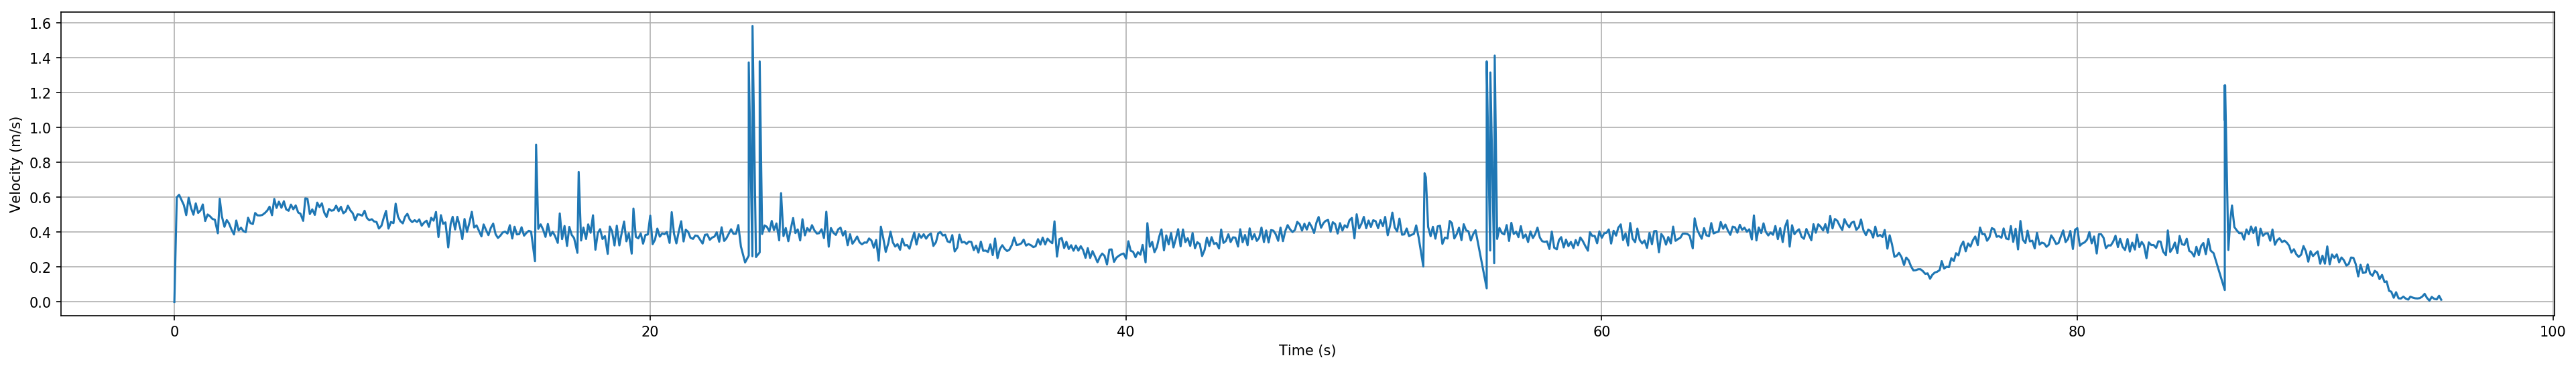

In [35]:
plt.figure(dpi=150, figsize=(32,4))
plt.grid()
# plt.xlim(0,51)
# plt.ylim(0,0.9)
plt.xlabel('Time (s)')
plt.ylabel('Velocity (m/s)')
# plt.xticks([40, 45, 50, 55, 60, 65, 70, 75, 80, 85, 90, 95, 100])
plt.plot(t, vMag)

## Filter the Velocity from T = 5.0 Sec and T =85.0 Sec 

In [36]:
df=df.loc[(df['t'] >= 0)]
df.reset_index(drop=True, inplace=True)
# df.head()
# df_new = df.iloc[df.t >= 0.0 and df.t <=51.0] 

## Plot Filtered Velocity Profile 

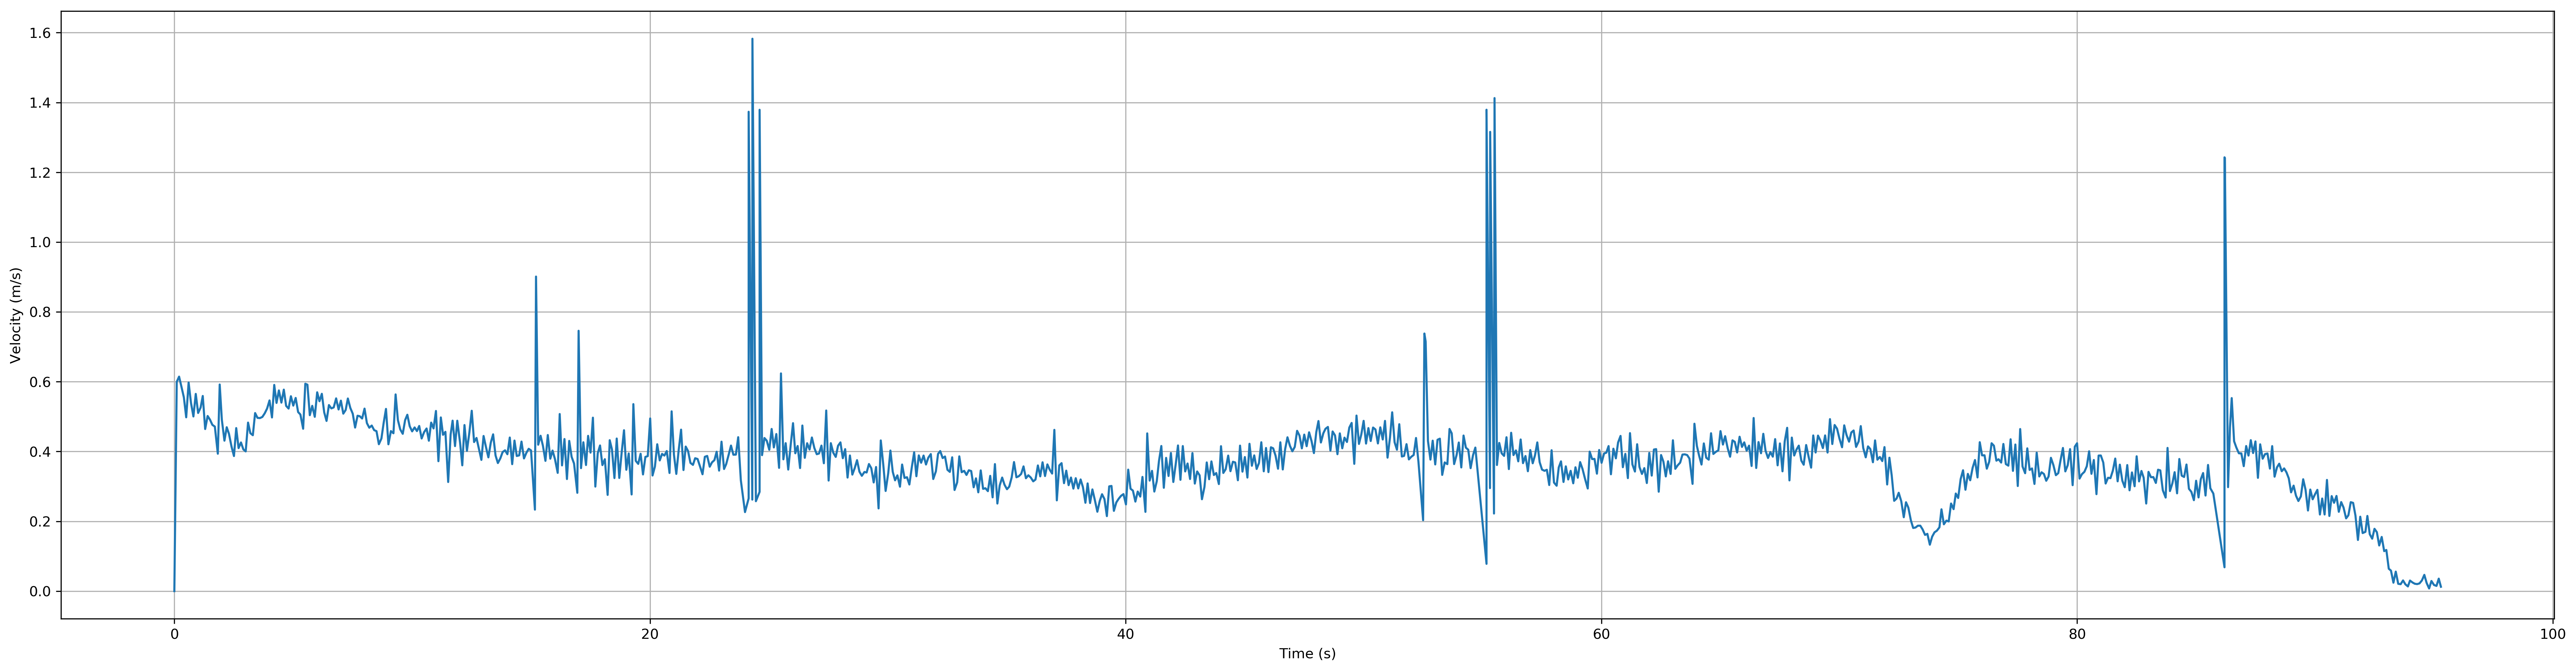

In [37]:
plt.figure(dpi=300, figsize=(32,8))
plt.grid()
# plt.xlim(5,84)
# plt.ylim(0,1.5)
plt.xlabel('Time (s)')
plt.ylabel('Velocity (m/s)')
# plt.xticks([40, 45, 50, 55, 60, 65, 70, 75, 80, 85, 90, 95, 100])
plt.plot(df.t, df.Vmag)

## Plot the Waypoints 

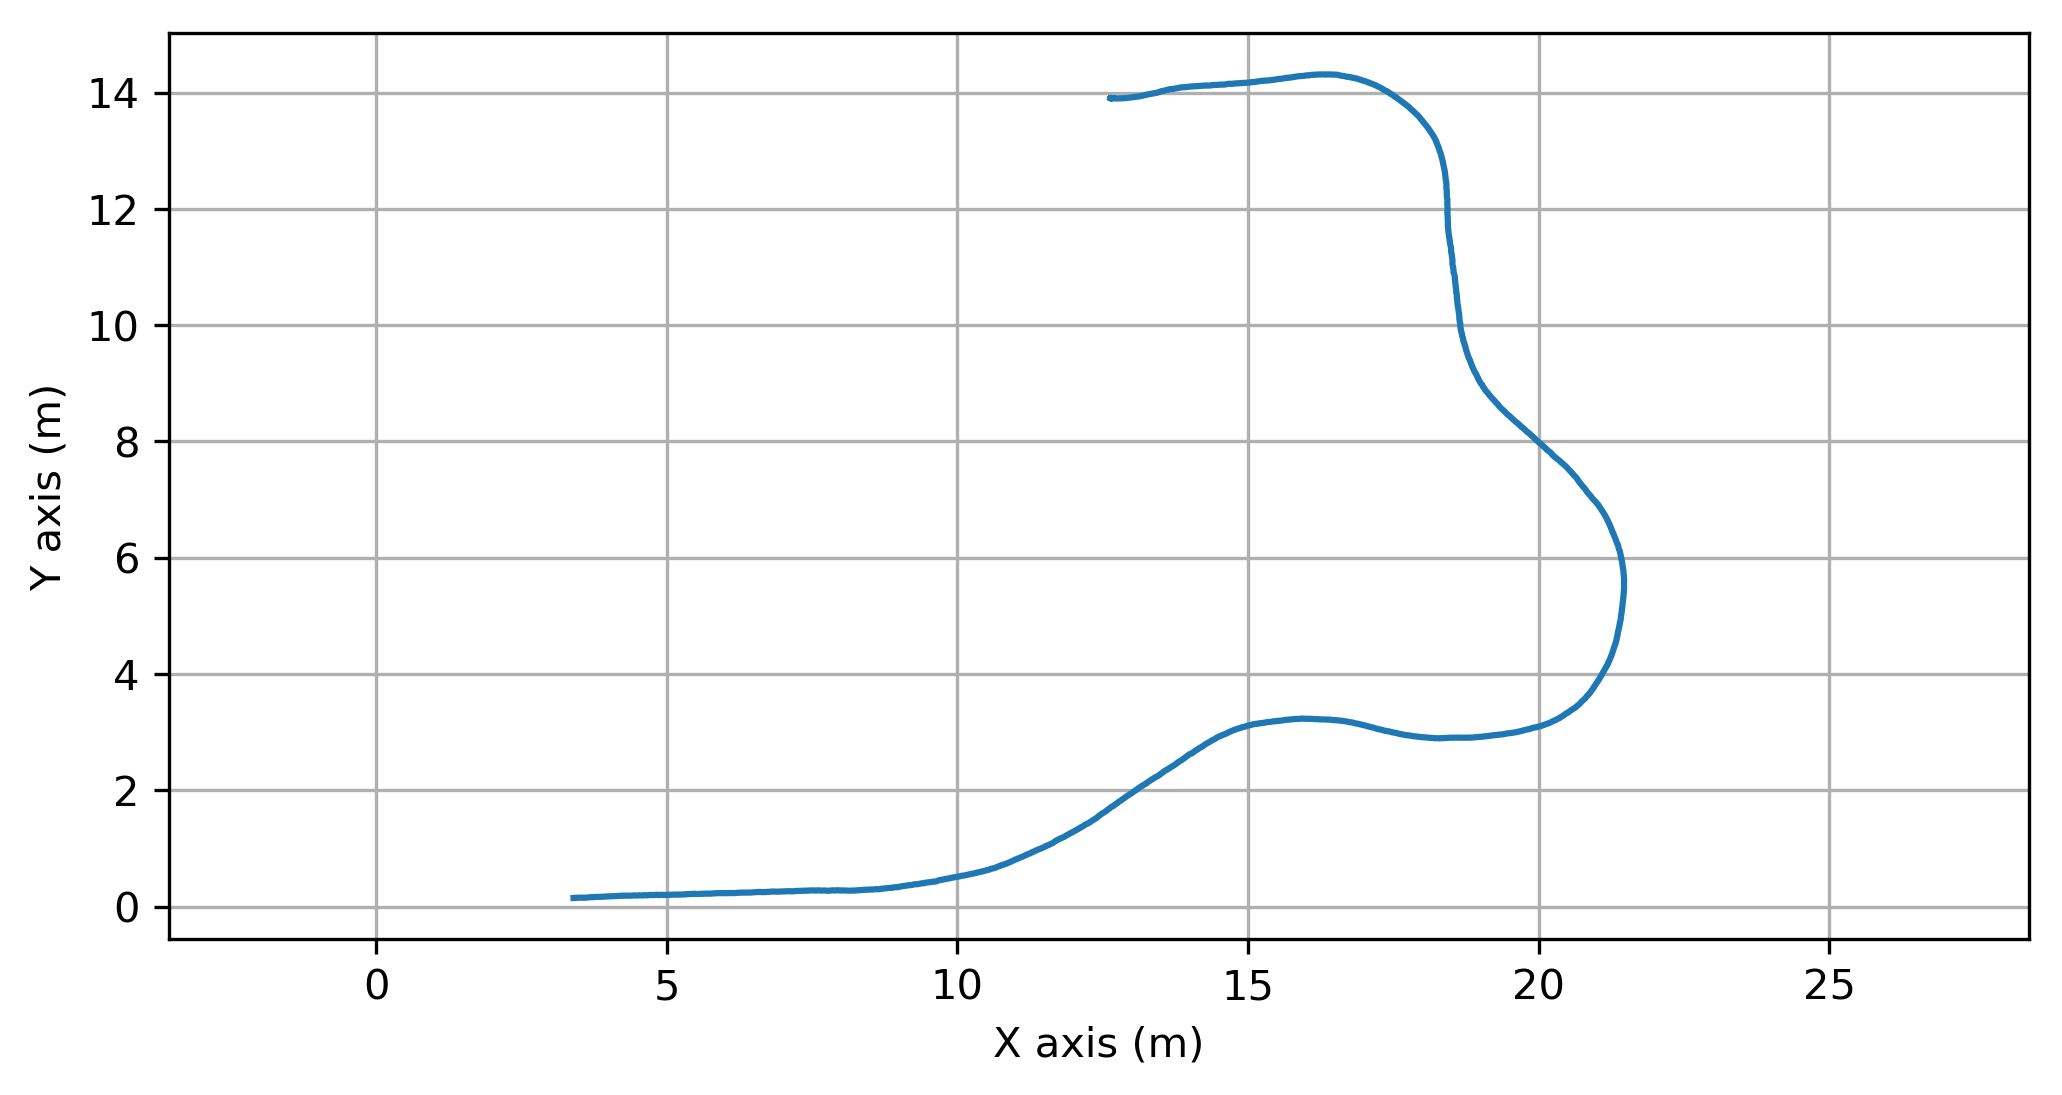

In [38]:
plt.figure(dpi=300, figsize=(8,4))
plt.grid()
plt.xlabel('X axis (m)')
plt.ylabel('Y axis (m)')
plt.axis('equal')
plt.plot(df.PosX , df.PosY)


In [39]:
carla_df = pd.DataFrame([df.PosX ,df.PosY , df.Vmag, df.t]).transpose()
carla_df.columns=['X','Y','V','Tway']
carla_df.Y = carla_df.Y
carla_df.Tway = carla_df.Tway - carla_df.Tway[0] 
# carla_df.X = carla_df.X - carla_df.X[0] 
# carla_df.Y = carla_df.Y - carla_df.Y[0] 
# carla_df.V = carla_df.V - carla_df.V[0] 
print(carla_df.columns.values)
print(carla_df.shape)
carla_df.head() 

['X' 'Y' 'V' 'Tway']
(954, 4)


,X,Y,V,Tway
0,3.397630,0.147319,0.000000,0.000000
1,3.458158,0.151046,0.599661,0.101128
2,3.518344,0.153026,0.614510,0.199123
3,3.576972,0.152057,0.585376,0.299290
4,3.632964,0.154617,0.555156,0.400254


#### Build waypoints

In [40]:
# # sample_df = carla_df_avgV[start:finish]
# sample_df = carla_df[1:41]
# print(sample_df)
# print(sample_df.shape)
def avg_calc(sample):
  return sample.mean()
  
# x,y,v,t = avg_calc(sample= sample_df)
# print(x,y,v,t)

start = 0
increment = 15
finish = start + increment 
t_wp = []
x = []
y = []
v = []

x.append(carla_df.X[0])
y.append(carla_df.Y[0])
v.append(carla_df.V[0])
t_wp.append(0.0)
t_wp_0 = carla_df.Tway[0]

# print('    X\t\t      Y\t\t     V\t\t     T')
for i in range((carla_df.shape[0] - start)//increment):
    sample_df = carla_df[start:finish]
    xVal, yVal, vVal, tVal = avg_calc(sample= sample_df)
    x.append(xVal)
    y.append(yVal)
    v.append(vVal)
    t_wp.append(tVal-t_wp_0)
    
    # print(round(xVal,6),'\t',round(yVal,6),'\t',round(vVal,6),'\t',round(tVal-t_wp_0,6))

    start = finish
    finish += increment

# print((t_wp))
waypoints_df = pd.DataFrame()
waypoints_df['X'] = x
waypoints_df['Y'] = y
waypoints_df['V'] = v
waypoints_df['T'] = t_wp
# waypoints_df['V_avg'] = waypoints_df['V'].rolling(15).mean()
# waypoints_df.columns=['T','X','Y','V']
waypoints_df.shape

(64, 4)

In [41]:
# from math import nan

# for i in range(0,14):
#     waypoints_df['V_avg'][i] = waypoints_df['V_avg'][14]/13 * i
# waypoints_df['V_avg']

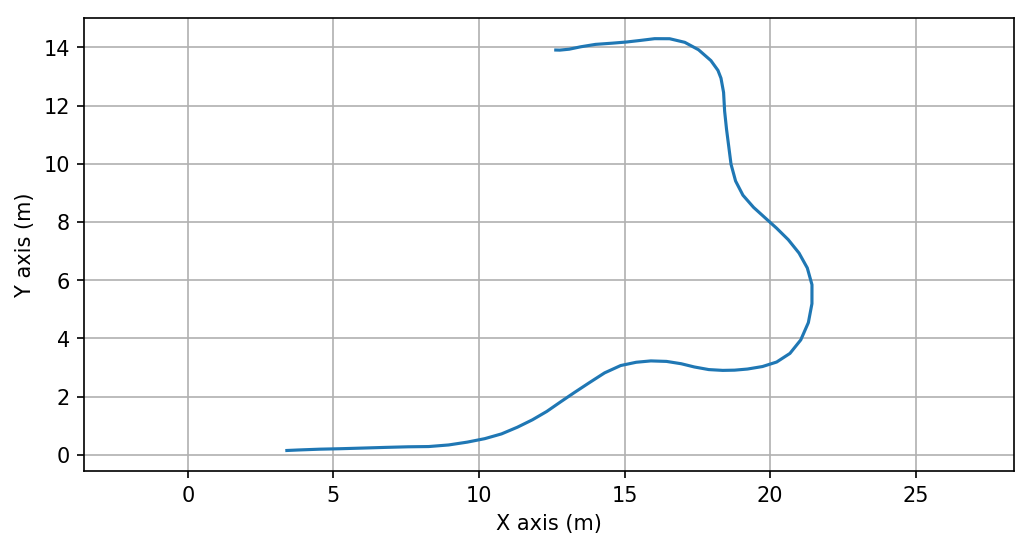

In [42]:
plt.figure(dpi=150, figsize=(8,4))
plt.grid()
plt.xlabel('X axis (m)')
plt.ylabel('Y axis (m)')
plt.axis('equal')
plt.plot(waypoints_df.X , waypoints_df.Y)

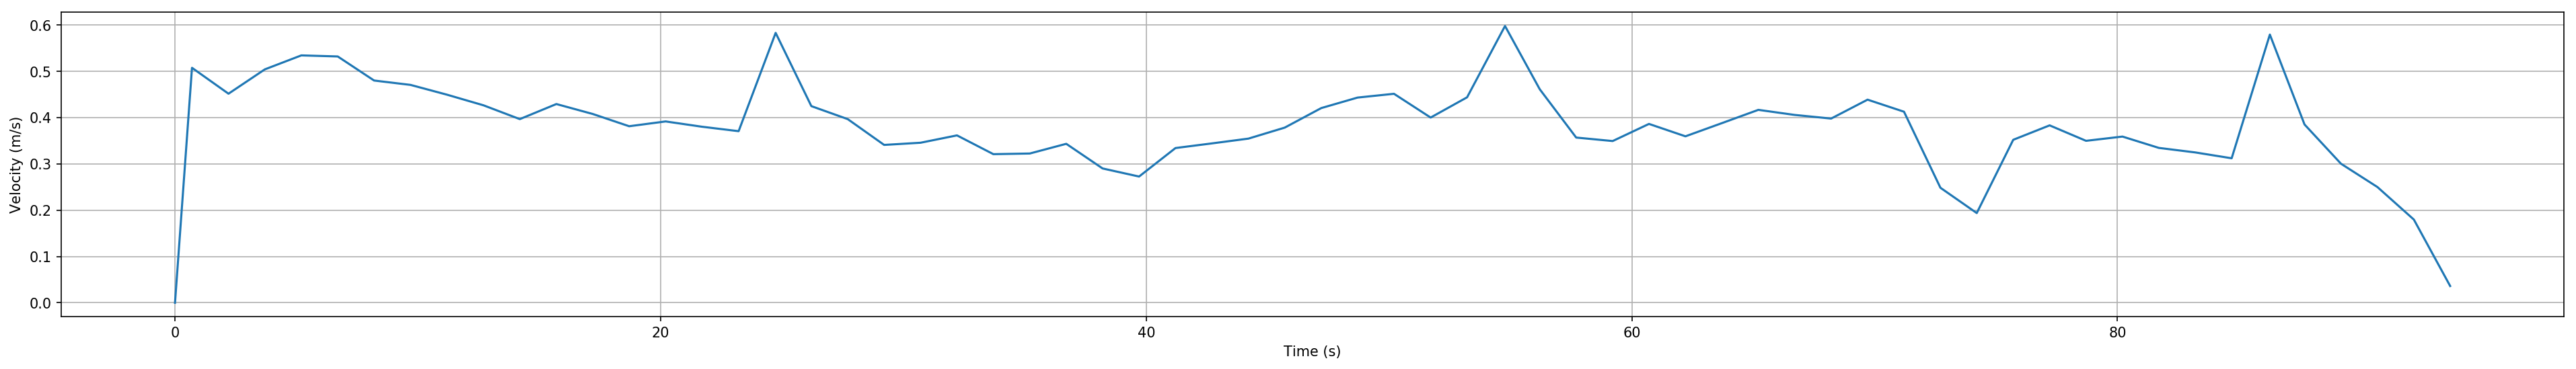

In [43]:
plt.figure(dpi=150, figsize=(32,4))
plt.grid()
# plt.xlim(39,102)
# plt.ylim(0,0.9)
plt.xlabel('Time (s)')
plt.ylabel('Velocity (m/s)')
# plt.xticks([40, 45, 50, 55, 60, 65, 70, 75, 80, 85, 90, 95, 100])
# plt.plot(t_wp, waypoints_df.V_avg)
plt.plot(t_wp, v)

#### This is to check when is the car going to move 

In [44]:
# df.index[(df['t'] >= 39.0) & (df['t']<=40.0)]
# for i in range(390,400):
#     print(df.iloc[i])

In [45]:
waypoints_df.head()

,X,Y,V,T
0,3.397630,0.147319,0.000000,0.000000
1,3.789007,0.164768,0.507758,0.699640
2,4.526403,0.192448,0.451799,2.203414
3,5.210551,0.207577,0.504360,3.698860
4,6.011258,0.230797,0.534570,5.201686


In [46]:
# waypoints_df.V = waypoints_df.V.mean()* 1.5
# waypoints_df.head()

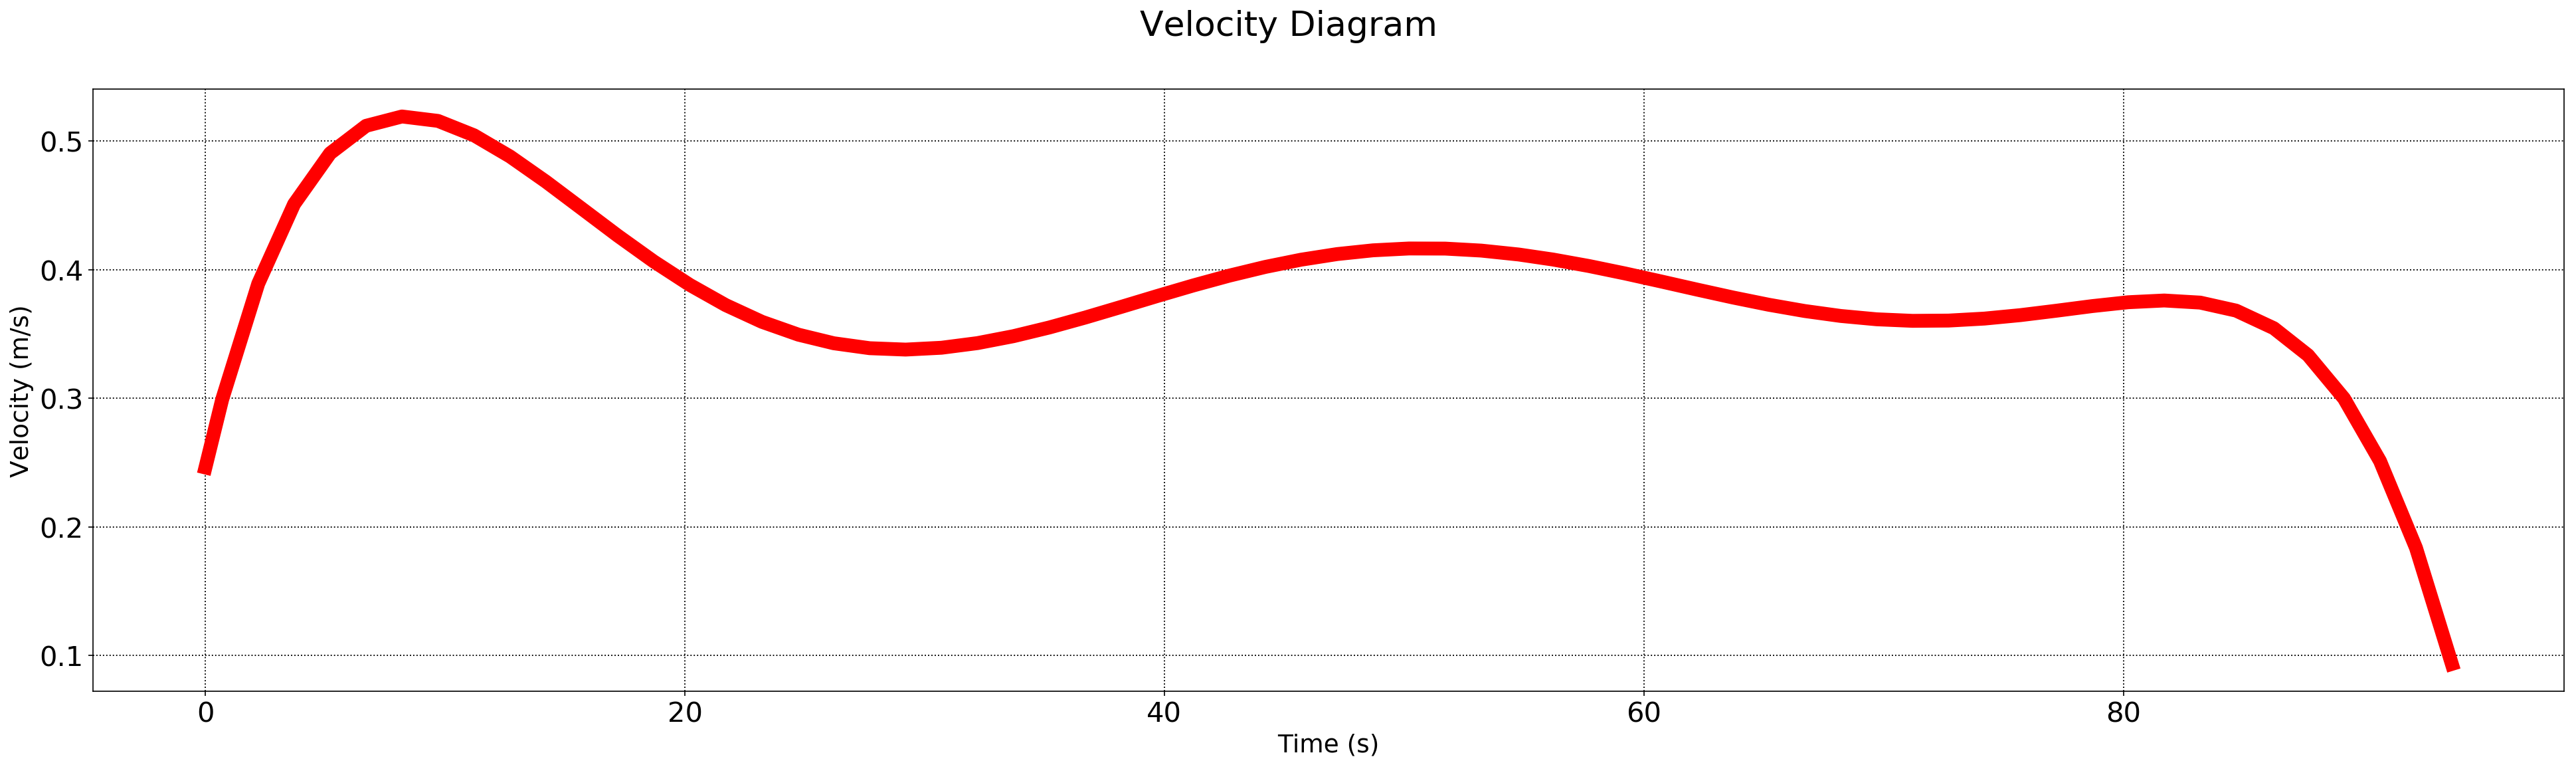

In [47]:
polyV = waypoints_df['V'].to_numpy()
polyT = waypoints_df['T'].to_numpy()
# print(polyT.shape)
V_polyfit = []
V_fcn = np.poly1d(np.polyfit(polyT , polyV,6))
for i in polyT:
    V_polyfit.append(V_fcn(i))
# print(V_fcn(t_wp[0]))
# print(V_polyfit)

plt.figure(dpi=150, figsize=(32,8))
plt.suptitle('Velocity Diagram', fontsize=25)
plt.grid(color = 'k', linestyle = ':', linewidth = 0.9)
# plt.xlim(0,65)
# plt.ylim(0,0.6)
plt.tick_params(axis='both', labelsize=20)

plt.xlabel('Time (s)',fontsize=18)
plt.ylabel('Velocity (m/s)',fontsize=18)

# plt.xticks([40, 45, 50, 55, 60, 65, 70, 75, 80, 85, 90, 95, 100])
# plt.plot(t_wp, waypoints_df.V_avg)
plt.plot(polyT, V_polyfit, color ='r',linewidth=10)

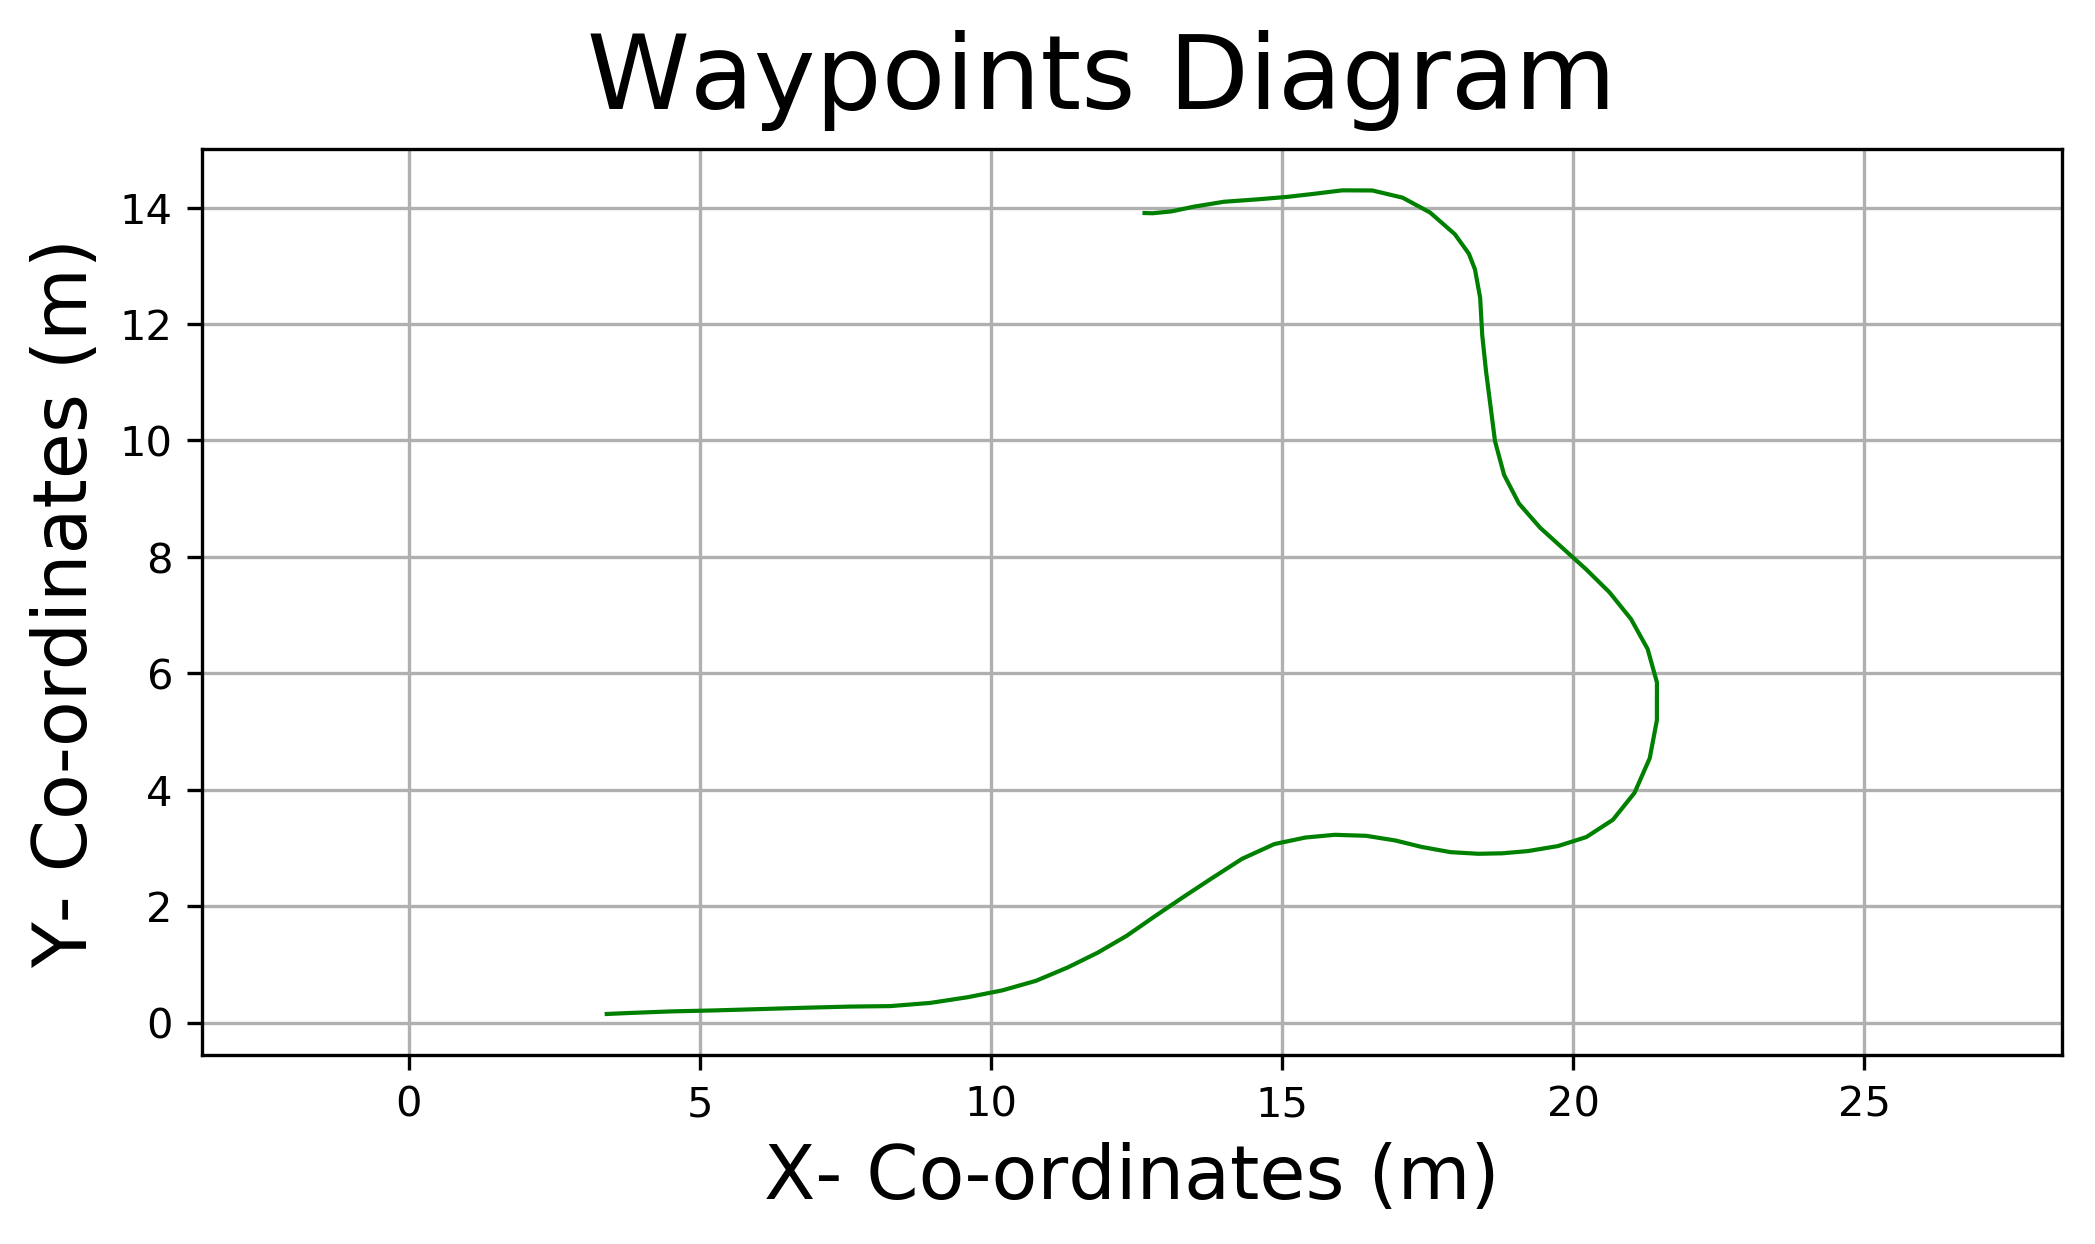

In [54]:
plt.figure(dpi=300, figsize=(8,4))
plt.suptitle('Waypoints Diagram', fontsize=25)
plt.grid()
plt.xlabel('X- Co-ordinates (m)',fontsize=18)
plt.ylabel('Y- Co-ordinates (m)',fontsize=18)
plt.axis('equal')
plt.plot(waypoints_df.X , waypoints_df.Y , color= 'g', linewidth=1)

In [55]:
# t_wp

# polyTrack = waypoints_df.V.to_numpy()
# # print(polyTrack)
# Track_polyfit = []
# Track_fcn = np.poly1d(np.polyfit(t_wp , polyTrack,6))
# for i in t_wp:
#     V_polyfit.append(V_fcn(i))
# # print(V_fcn(t_wp[0]))
# # print(V_polyfit)

# plt.figure(dpi=150, figsize=(32,8))
# plt.suptitle('Velocity Diagram', fontsize=25)
# plt.grid(color = 'k', linestyle = ':', linewidth = 0.9)
# # plt.xlim(0,65)
# # plt.ylim(0,0.6)
# plt.tick_params(axis='both', labelsize=20)

# plt.xlabel('Time (s)',fontsize=18)
# plt.ylabel('Velocity (m/s)',fontsize=18)

# # plt.xticks([40, 45, 50, 55, 60, 65, 70, 75, 80, 85, 90, 95, 100])
# # plt.plot(t_wp, waypoints_df.V_avg)
# plt.plot(t_wp, V_polyfit, color ='r',linewidth=10)

In [56]:
# waypoints_df.shape

In [144]:
# waypoints_df.V =  V_polyfit
# waypoints_df.V *= 1.0
# finaldf = pd.DataFrame([waypoints_df.X ,waypoints_df.Y , waypoints_df.V]).transpose()
# finaldf.to_csv("racetrack_waypoints.txt", header=False,index=False)
# finaldf.head()

In [57]:
waypoints_df.V =  V_polyfit
waypoints_df.V -= waypoints_df.V[0]
finaldf = pd.DataFrame([waypoints_df.X, waypoints_df.Y, waypoints_df.V]).transpose()
finaldf.to_csv("w_demo.csv", header=False, index=False)
print(finaldf.shape)
finaldf.head()

(64, 3)


,X,Y,V
0,3.397630,0.147319,0.000000
1,3.789007,0.164768,0.052979
2,4.526403,0.192448,0.142971
3,5.210551,0.207577,0.204820
4,6.011258,0.230797,0.244348


In [58]:
# polyV = carla_df['V'].to_numpy()
# polyT = carla_df['Tway'].to_numpy()
# # print(polyT.shape)
# V_polyfit = []
# V_fcn = np.poly1d(np.polyfit(polyT , polyV,6))
# for i in polyT:
#     V_polyfit.append(V_fcn(i))
# # print(V_fcn(t_wp[0]))
# # print(V_polyfit)

# plt.figure(dpi=150, figsize=(32,8))
# plt.suptitle('Velocity Diagram', fontsize=25)
# plt.grid(color = 'k', linestyle = ':', linewidth = 0.9)
# # plt.xlim(0,65)
# # plt.ylim(0,0.6)
# plt.tick_params(axis='both', labelsize=20)

# plt.xlabel('Time (s)',fontsize=18)
# plt.ylabel('Velocity (m/s)',fontsize=18)

# # plt.xticks([40, 45, 50, 55, 60, 65, 70, 75, 80, 85, 90, 95, 100])
# plt.plot(polyT, V_polyfit, color ='r',linewidth=10)

In [59]:
# carla_df.V =  V_polyfit
# carla_df.V -= carla_df.V[0]
# finaldf = pd.DataFrame([carla_df.X, carla_df.Y, carla_df.V]).transpose()
# finaldf.to_csv("w_test.csv", header=False, index=False)
# print(finaldf.shape)
# finaldf.head()

$E_{x} = (E_{x1} + E_{x2} \cdot df_{z} + E_{x3} \cdot df_{z}^{2}) \cdot (1 – E_{x4} \cdot \text{sgn}(k_{x}))$



$df_{z} = \frac{F_{z}-F_{z0}}{F_{z0}}$

$mu_{x} = D_{x1} + D_{x2} \cdot df_{z}$

$F_{z} = F_{z} \cdot D \cdot \sin \left ( C \cdot \arctan \left \{ B \cdot k – E \cdot \left [ B \cdot k – \arctan(B \cdot k) \right ] \right \} \right )$
